In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from tensorflow.keras.datasets import cifar10

In [11]:
(x_train,y_train),(x_test,y_test)= cifar10.load_data()

In [12]:
x_test.shape

(10000, 32, 32, 3)

In [13]:
x_train[0].shape

(32, 32, 3)

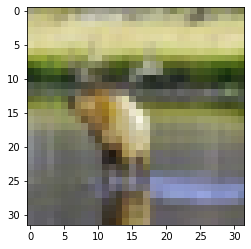

In [17]:
plt.imshow(x_train[89])

In [18]:
x_train= x_train/255
x_test = x_test/255

In [21]:
from tensorflow.keras.utils import to_categorical

In [22]:
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [30]:
model = Sequential()
#adding more convolusional and pooling layer is recommended for images that have large datasets.
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
#you can expand the number of filters in the second conv and pooling layer for better performance.
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
early_stopping = EarlyStopping(monitor='val_loss',patience=2)

In [32]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=early_stopping)

Epoch 1/15
1563/1563 [==============================] - 23s 15ms/step - loss: 1.4699 - accuracy: 0.4678 - val_loss: 1.2332 - val_accuracy: 0.5500
Epoch 2/15
1563/1563 [==============================] - 23s 15ms/step - loss: 1.1306 - accuracy: 0.5972 - val_loss: 1.1148 - val_accuracy: 0.6083
Epoch 3/15
1563/1563 [==============================] - 23s 15ms/step - loss: 0.9862 - accuracy: 0.6526 - val_loss: 1.0123 - val_accuracy: 0.6510
Epoch 4/15
1563/1563 [==============================] - 23s 15ms/step - loss: 0.8747 - accuracy: 0.6941 - val_loss: 0.9814 - val_accuracy: 0.6601
Epoch 5/15
1563/1563 [==============================] - 23s 15ms/step - loss: 0.7806 - accuracy: 0.7272 - val_loss: 0.9508 - val_accuracy: 0.6819
Epoch 6/15
1563/1563 [==============================] - 23s 15ms/step - loss: 0.6948 - accuracy: 0.7571 - val_loss: 0.9320 - val_accuracy: 0.6943
Epoch 7/15
1563/1563 [==============================] - 23s 15ms/step - loss: 0.6215 - accuracy: 0.7807 - val_loss: 0.9577 -

In [33]:
metrics = pd.DataFrame(model.history.history)

In [35]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,1.469860,0.46780,1.233192,0.5500
1,1.130588,0.59720,1.114759,0.6083
2,0.986185,0.65264,1.012346,0.6510
3,0.874704,0.69408,0.981367,0.6601
4,0.780630,0.72720,0.950847,0.6819


In [36]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

<AxesSubplot:>

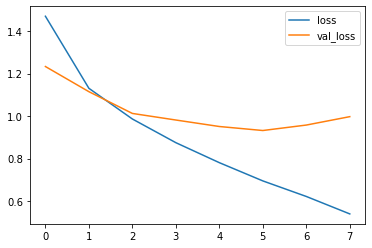

In [37]:
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

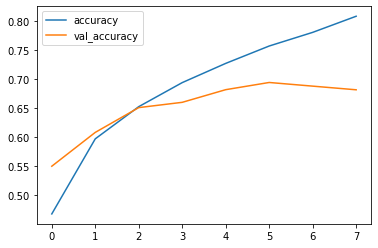

In [38]:
metrics[['accuracy','val_accuracy']].plot()

In [39]:
from sklearn.metrics import confusion_matrix,classification_report

In [40]:
predicition = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [43]:
print(classification_report(predicition,y_test))

              precision    recall  f1-score   support

           0       0.70      0.73      0.71       960
           1       0.83      0.82      0.83      1019
           2       0.62      0.56      0.59      1117
           3       0.59      0.45      0.51      1307
           4       0.55      0.70      0.62       787
           5       0.57      0.55      0.56      1024
           6       0.69      0.81      0.75       846
           7       0.72      0.75      0.73       957
           8       0.83      0.76      0.79      1089
           9       0.72      0.80      0.76       894

    accuracy                           0.68     10000
   macro avg       0.68      0.69      0.68     10000
weighted avg       0.68      0.68      0.68     10000



In [47]:
confusion_matrix(y_test,predicition)

array([[698,  23,  57,  29,  22,  11,   4,  10, 108,  38],
       [ 22, 833,   9,  17,   6,   8,   8,   4,  32,  61],
       [ 60,   7, 623,  91,  52,  68,  39,  35,  18,   7],
       [ 19,   7,  85, 586,  41, 162,  45,  30,  13,  12],
       [ 25,   2, 101, 112, 553,  51,  38,  90,  22,   6],
       [ 13,   1,  83, 249,  29, 568,  12,  32,   6,   7],
       [ 11,  11,  75,  97,  37,  44, 688,  14,  12,  11],
       [ 21,   2,  46,  70,  39,  82,   4, 719,   4,  13],
       [ 55,  29,  21,  21,   5,  13,   3,   3, 830,  20],
       [ 36, 104,  17,  35,   3,  17,   5,  20,  44, 719]], dtype=int64)

In [52]:
my_image = x_test[16]

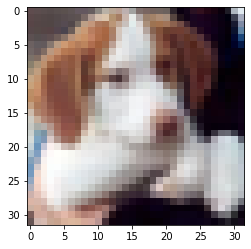

In [53]:
plt.imshow(my_image)

In [54]:
model.predict_classes(my_image.reshape(1,32,32,3))

array([5], dtype=int64)